# Libraries



- same as before

In [9]:
import importlib

# Check if Augmentor is installed, install it if not
if importlib.util.find_spec("Augmentor") is None:
    print("Augmentor package not found. Installing...")
    !pip install Augmentor

# Check if OpenCV is installed, install it if not
if importlib.util.find_spec("cv2") is None:
    print("OpenCV package not found. Installing...")
    !pip install opencv-python

# Check if NumPy is installed, install it if not
if importlib.util.find_spec("numpy") is None:
    print("NumPy package not found. Installing...")
    !pip install numpy

# Check if PIL is installed, install it if not
if importlib.util.find_spec("PIL") is None:
    print("PIL package not found. Installing...")
    !pip install Pillow

# Check if specific PIL modules are installed, install them if not
if importlib.util.find_spec("PIL.ImageEnhance") is None:
    print("PIL module ImageEnhance not found. Installing...")
    !pip install Pillow

if importlib.util.find_spec("PIL.ImageFilter") is None:
    print("PIL module ImageFilter not found. Installing...")
    !pip install Pillow
    
import Augmentor
import cv2
import numpy as np 
import matplotlib.pyplot as plt

from Augmentor.Operations import Operation
from IPython.display import display
from PIL import Image,ImageEnhance,ImageFilter

# Creating Augmentor Pipelines for Feature Extraction from Augmented Images

The augmented images generated in the previous step are loaded into pipeline objects to facilitate further processing and feature extraction. These pipeline objects serve as a structured framework for applying various image processing operations and transformations to the augmented images. By leveraging the capabilities of Augmentor Pipelines, we can efficiently extract meaningful features from the augmented images to enhance the performance of our subsequent analysis or machine learning tasks.

In [10]:
pline_head = Augmentor.Pipeline("Coins/head_/output")
pline_tail = Augmentor.Pipeline("Coins/tail_/output")

Initialised with 117 image(s) found.
Output directory set to Coins/head_/output\output.Initialised with 108 image(s) found.
Output directory set to Coins/tail_/output\output.

# Hu Moments

Hu moments, also known as Hu invariant moments or Hu's seven moments, are a set of mathematical descriptors used in digital image processing to characterize the shape or morphology of an object in an image. They were introduced by M. K. Hu in 1962.

Hu moments are based on the concept of image moments, which are statistical measures that summarize the spatial distribution of pixel intensities in an image. Image moments provide information about the centroid, area, orientation, and other geometric properties of an object in an image.

Hu moments are a translation-, scale-, and rotation-invariant representation of the image moments. They are calculated from the central moments of an image, which are computed by subtracting the weighted average of the pixel intensities from the raw moments. By considering the central moments, Hu moments become invariant to translation and scale. Further, by applying a series of mathematical transformations, Hu moments are made invariant to rotation as well.

They capture important shape characteristics of an object, such as symmetry, roundness, elongation, and other shape properties.
In the context of coin recognition, Hu moments can be employed by extracting these moments from coin images and comparing them to a database of known coin Hu moments. By calculating and comparing Hu moments, coins can be classified or identified based on their similarity to the reference Hu moments in the database.

The seven Hu moments are mathematically derived from the normalized central moments, and they are calculated as follows:

1. Hu Moment 1 (𝜇20 + 𝜇02)
2. Hu Moment 2 ((𝜇20 - 𝜇02)^2 + 4𝜇11^2)
3. Hu Moment 3 ((𝜇30 - 3𝜇12)^2 + (3𝜇21 - 𝜇03)^2)
4. Hu Moment 4 ((𝜇30 + 𝜇12)^2 + (𝜇21 + 𝜇03)^2)
5. Hu Moment 5 ((𝜇30 - 3𝜇12)(𝜇30 + 𝜇12)[(𝜇30 + 𝜇12)^2 - 3(𝜇21 + 𝜇03)^2] + (3𝜇21 - 𝜇03)(𝜇21 + 𝜇03)[3(𝜇30 + 𝜇12)^2 - (𝜇21 + 𝜇03)^2])
6. Hu Moment 6 ((𝜇20 - 𝜇02)[(𝜇30 + 𝜇12)^2 - (𝜇21 + 𝜇03)^2] + 4𝜇11(𝜇30 + 𝜇12)(𝜇21 + 𝜇03))
7. Hu Moment 7 ((3𝜇21 - 𝜇03)(𝜇30 + 𝜇12)[(𝜇30 + 𝜇12)^2 - 3(𝜇21 + 𝜇03)^2] - (𝜇30 - 3𝜇12)(𝜇21 + 𝜇03)[3(𝜇30 + 𝜇12)^2 - (𝜇21 + 𝜇03)^2])

These Hu moments form a compact and powerful representation of the object's shape, which can be used for various image analysis and recognition tasks.

In [3]:
from feature_extraction_operations import hu_moments

In [4]:
def plot (df) :
    df.plot(kind='bar', figsize=(10, 6))

    # Set plot labels and title
    plt.xlabel('Class Label')
    plt.ylabel('Variance')
    plt.title('Variance of Hu Moments by Class Label')

    plt.show()

head Hu features


,Image Name,Class Label,Hu Moment 1,Hu Moment 2,Hu Moment 3,Hu Moment 4,Hu Moment 5,Hu Moment 6,Hu Moment 7
0,C10_original_10c.jpg_003e8082-a22f-4cbc-afba-4...,h_C10,0.001242,4.307010e-09,1.703580e-13,2.440091e-12,2.511688e-25,1.089638e-16,-1.553044e-24
1,C10_original_10c.jpg_0870e362-19cc-48f0-a5e1-f...,h_C10,0.001241,3.892736e-09,2.748095e-13,2.428998e-12,6.462022e-25,9.776947e-17,-1.876370e-24
2,C10_original_10c.jpg_4325f9ef-1e35-4bbc-bd7f-2...,h_C10,0.001239,3.997938e-09,2.524114e-13,2.442252e-12,3.832826e-25,1.009101e-16,-1.878824e-24
3,C10_original_10c.jpg_7a27384e-5e22-4878-a7d9-8...,h_C10,0.001242,4.281670e-09,3.302681e-13,2.465137e-12,8.297256e-26,1.039113e-16,-2.222760e-24
4,C10_original_10c.jpg_e3101fc8-4335-419f-a2ad-d...,h_C10,0.001247,3.716053e-09,2.002256e-13,2.626886e-12,1.373055e-24,1.161099e-16,-1.320677e-24
...,...,...,...,...,...,...,...,...,...
112,R5_original_R5_O1.png_4c188c98-c4c6-43a6-8e49-...,h_R5,0.001884,7.144966e-08,3.851557e-11,4.097247e-11,-1.570526e-22,-9.787049e-15,1.620038e-21
113,R5_original_R5_O1.png_8612d252-e225-4550-9000-...,h_R5,0.001884,7.144966e-08,3.851557e-11,4.097247e-11,-1.570526e-22,-9.787049e-15,1.620038e-21
114,R5_original_R5_O1.png_8729c2d1-0ae7-4907-83da-...,h_R5,0.001889,5.312616e-08,3.498848e-11,4.578097e-11,-8.849142e-22,-1.054365e-14,1.604416e-21
115,R5_original_R5_O1.png_b5cbc5a3-d8b6-4ffd-9598-...,h_R5,0.001878,1.573515e-08,1.477737e-10,4.729282e-11,3.899719e-22,-5.729606e-15,3.934308e-21


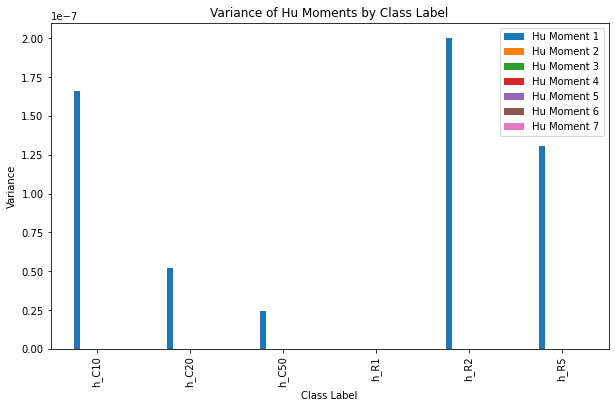


tail Hu features


,Image Name,Class Label,Hu Moment 1,Hu Moment 2,Hu Moment 3,Hu Moment 4,Hu Moment 5,Hu Moment 6,Hu Moment 7
0,C10_original_10c_R1.png_04312269-f447-4f65-ada...,t_C10,0.001253,7.240134e-08,2.124081e-10,2.896799e-11,2.435308e-22,6.065441e-15,-2.259198e-21
1,C10_original_10c_R1.png_0d02994a-29b9-4312-a51...,t_C10,0.001252,7.154426e-08,2.067810e-10,2.692128e-11,1.615665e-22,5.528614e-15,-2.002117e-21
2,C10_original_10c_R1.png_155d1889-c2c6-486d-b2f...,t_C10,0.001254,7.245511e-08,2.070263e-10,2.707653e-11,1.668716e-22,5.598011e-15,-2.020347e-21
3,C10_original_10c_R1.png_1cee84ec-2550-4b39-bcd...,t_C10,0.001256,7.363971e-08,2.082694e-10,2.691943e-11,1.559467e-22,5.587522e-15,-2.009592e-21
4,C10_original_10c_R1.png_5753b231-7746-4752-8e8...,t_C10,0.001254,7.260469e-08,2.093713e-10,2.722474e-11,1.876905e-22,5.659940e-15,-2.046849e-21
...,...,...,...,...,...,...,...,...,...
103,R5_original_R5_RA.png_799f79ae-2302-4ed2-a2bc-...,t_R5,0.001372,6.407917e-08,4.018495e-11,6.755006e-11,-2.885731e-21,-2.730641e-15,-2.014654e-21
104,R5_original_R5_RA.png_7ce8549a-33d4-4990-9afd-...,t_R5,0.001369,6.925342e-08,3.729785e-11,6.784330e-11,-2.573273e-21,1.471847e-16,-2.241655e-21
105,R5_original_R5_RA.png_f7769608-72af-4325-ae66-...,t_R5,0.001369,6.550008e-08,4.297989e-11,6.698617e-11,-2.975564e-21,-1.847262e-15,-2.016129e-21
106,R5_original_R5_RA.png_fbc1c401-fb82-4016-a3ac-...,t_R5,0.001370,6.516562e-08,4.420384e-11,6.788832e-11,-3.118516e-21,-1.386222e-15,-2.026226e-21


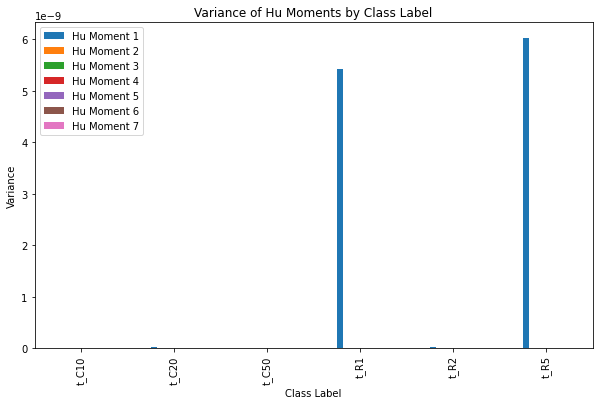

In [5]:
h_hu_features = hu_moments.Extract(pline_head,'h_')
v_h = h_hu_features.groupby("Class Label").var()
print('head Hu features')
display(h_hu_features)
plot(v_h)

t_hu_features = hu_moments.Extract(pline_tail,'t_')
v_t = t_hu_features.groupby("Class Label").var()
print('\ntail Hu features')
display(t_hu_features)
plot(v_t)

# SIFT (Scale-Invariant Feature Transform) 

This is a popular algorithm used in digital image processing for extracting and describing local features from images. It was introduced by David Lowe in 1999.

SIFT features are distinctive and robust to changes in scale, rotation, and partial occlusion, making them widely used in various computer vision tasks such as object recognition, image stitching, and 3D reconstruction. Here are the key steps involved in the SIFT algorithm:

1. Scale-space Extrema Detection: SIFT operates on multiple scales of an image to handle variations in object size. It uses a Difference of Gaussians (DoG) approach to identify potential interest points or keypoints that are invariant to scale changes.

2. Keypoint Localization: The detected keypoints are refined by eliminating unstable keypoints and localizing them precisely at subpixel accuracy. This is done by analyzing the intensity values and gradients in the scale-space.

3. Orientation Assignment: Each keypoint is assigned a dominant orientation based on the local image gradient directions. This step ensures invariance to image rotation by normalizing the orientations of keypoints.

4. Keypoint Descriptor Calculation: SIFT generates a descriptor for each keypoint, which encodes the local image information around the keypoint. The descriptor is computed by considering the gradients and orientations in the surrounding region of the keypoint. It captures distinctive characteristics of the local image structure.

5. Keypoint Matching: SIFT descriptors can be compared using distance measures such as Euclidean distance or cosine similarity. Keypoint matching is performed to find corresponding keypoints between different images, enabling tasks like image alignment, object recognition, or image retrieval.

SIFT features are widely used in computer vision applications due to their robustness and distinctive nature. They provide a reliable representation of local image information that is invariant to various transformations, making them suitable for matching and recognizing objects under different conditions.

In [6]:
from feature_extraction_operations import sift_scores

In [7]:
h_sift_features = sift_scores.Extract(pline_head,'h_',50)
print('head Hu features')
display(h_sift_features)

t_sift_features = sift_scores.Extract(pline_tail,'t_',50)
print('\ntail Hu features')
display(t_sift_features)

head Hu features


,Image Name,Class Label,SIFT Score 1,SIFT Score 2,SIFT Score 3,SIFT Score 4,SIFT Score 5,SIFT Score 6,SIFT Score 7,SIFT Score 8,...,SIFT Score 74391,SIFT Score 74392,SIFT Score 74393,SIFT Score 74394,SIFT Score 74395,SIFT Score 74396,SIFT Score 74397,SIFT Score 74398,SIFT Score 74399,SIFT Score 74400
0,C10_original_10c.jpg_003e8082-a22f-4cbc-afba-4...,h_C10,-147.423523,-88.283051,-1.319574,85.549919,2.124449,125.269371,-28.549870,124.395638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C10_original_10c.jpg_0870e362-19cc-48f0-a5e1-f...,h_C10,-96.665039,-107.525085,-31.425653,-212.215469,83.056145,-23.381685,83.329422,-80.472466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C10_original_10c.jpg_4325f9ef-1e35-4bbc-bd7f-2...,h_C10,-150.720551,-122.071754,-43.524673,133.833511,4.544518,-154.715225,-39.471535,120.884537,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C10_original_10c.jpg_7a27384e-5e22-4878-a7d9-8...,h_C10,-91.880089,26.212730,214.049820,11.858852,-55.106239,120.857742,25.802464,28.640995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C10_original_10c.jpg_e3101fc8-4335-419f-a2ad-d...,h_C10,-200.710098,-110.855370,5.618886,-112.064331,-148.003143,-35.544888,-43.441330,-65.954285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,R5_original_R5_O1.png_4c188c98-c4c6-43a6-8e49-...,h_R5,-249.589249,-47.012119,-25.282568,-54.268661,-57.301552,-45.023144,2.952070,13.754316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,R5_original_R5_O1.png_8612d252-e225-4550-9000-...,h_R5,-249.588898,-47.011909,-25.282894,-54.268288,-57.304672,-45.019444,2.951890,13.753850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,R5_original_R5_O1.png_8729c2d1-0ae7-4907-83da-...,h_R5,-57.858936,58.292553,96.797729,9.075206,-38.179184,-172.508057,125.491394,-13.388444,...,-6.610105,-20.110062,-6.758468,-14.340106,-4.877873,-9.774623,5.646247,18.208414,-16.090981,26.479834
115,R5_original_R5_O1.png_b5cbc5a3-d8b6-4ffd-9598-...,h_R5,-109.927704,89.720497,-130.120300,-106.070084,-35.196072,34.251217,0.696648,28.007191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



tail Hu features


,Image Name,Class Label,SIFT Score 1,SIFT Score 2,SIFT Score 3,SIFT Score 4,SIFT Score 5,SIFT Score 6,SIFT Score 7,SIFT Score 8,...,SIFT Score 79491,SIFT Score 79492,SIFT Score 79493,SIFT Score 79494,SIFT Score 79495,SIFT Score 79496,SIFT Score 79497,SIFT Score 79498,SIFT Score 79499,SIFT Score 79500
0,C10_original_10c_R1.png_04312269-f447-4f65-ada...,t_C10,115.515617,16.865414,143.104294,-39.398949,-79.765739,1.240348,21.343359,-9.964072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C10_original_10c_R1.png_0d02994a-29b9-4312-a51...,t_C10,303.983337,10.099391,-121.445839,26.602425,-18.443985,17.218903,12.987032,13.712034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C10_original_10c_R1.png_155d1889-c2c6-486d-b2f...,t_C10,307.812531,-7.815350,115.061287,58.430855,-52.319679,-12.841707,-15.583682,39.671616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C10_original_10c_R1.png_1cee84ec-2550-4b39-bcd...,t_C10,76.120193,44.323154,158.390610,-54.415611,148.019241,0.039734,57.598141,-103.392525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C10_original_10c_R1.png_5753b231-7746-4752-8e8...,t_C10,253.145248,35.377163,61.472656,105.484421,-115.289581,36.700272,0.960231,79.822792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,R5_original_R5_RA.png_799f79ae-2302-4ed2-a2bc-...,t_R5,216.699036,73.817184,-15.213104,154.351532,-88.301956,-28.979923,17.996162,1.513462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,R5_original_R5_RA.png_7ce8549a-33d4-4990-9afd-...,t_R5,193.780334,34.447197,-21.690674,46.680950,191.697388,-29.709167,-4.085192,-0.763115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,R5_original_R5_RA.png_f7769608-72af-4325-ae66-...,t_R5,274.349030,43.856007,-1.442781,-139.070740,110.534470,83.563255,-4.989688,30.636171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,R5_original_R5_RA.png_fbc1c401-fb82-4016-a3ac-...,t_R5,278.706360,45.039326,-63.720604,-114.882812,35.399708,-33.596298,19.051310,39.964344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Save features for model building

In [8]:
import os

pwd = os.getcwd()

h_hu_features.to_csv(pwd+'/feature_data/hu_head.csv', index=False)
t_hu_features.to_csv(pwd+'/feature_data/hu_tail.csv', index=False)

h_sift_features.to_csv(pwd+'/feature_data/sift_head.csv', index=False)
t_sift_features.to_csv(pwd+'/feature_data/sift_tail.csv', index=False)